In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px



In [196]:
dir(px)

['Constant',
 'IdentityMap',
 'NO_COLOR',
 'Range',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_chart_types',
 '_core',
 '_doc',
 '_imshow',
 '_special_inputs',
 'absolute_import',
 'area',
 'bar',
 'bar_polar',
 'box',
 'choropleth',
 'choropleth_mapbox',
 'colors',
 'data',
 'defaults',
 'density_contour',
 'density_heatmap',
 'density_mapbox',
 'funnel',
 'funnel_area',
 'get_trendline_results',
 'histogram',
 'imshow',
 'imshow_utils',
 'line',
 'line_3d',
 'line_geo',
 'line_mapbox',
 'line_polar',
 'line_ternary',
 'optional_imports',
 'parallel_categories',
 'parallel_coordinates',
 'pd',
 'pie',
 'scatter',
 'scatter_3d',
 'scatter_geo',
 'scatter_mapbox',
 'scatter_matrix',
 'scatter_polar',
 'scatter_ternary',
 'set_mapbox_access_token',
 'strip',
 'sunburst',
 'timeline',
 'treemap',
 'violin']

In [111]:
ramen_df = pd.read_csv("resources/ramen-ratings.csv")
ramen_df['Top Ten'] = ramen_df['Top Ten'].replace([np.nan,'\n'],'')
ramen_df['Stars'] = ramen_df['Stars'].replace('Unrated',0)
ramen_df = ramen_df.astype({'Stars':'float64'})
ramen_df = ramen_df.set_index('Review #')
ramen_df


,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,
2576,Ching's Secret,Singapore Curry,Pack,India,3.75,
...,...,...,...,...,...,...
5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.50,
4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,
3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,


In [182]:
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


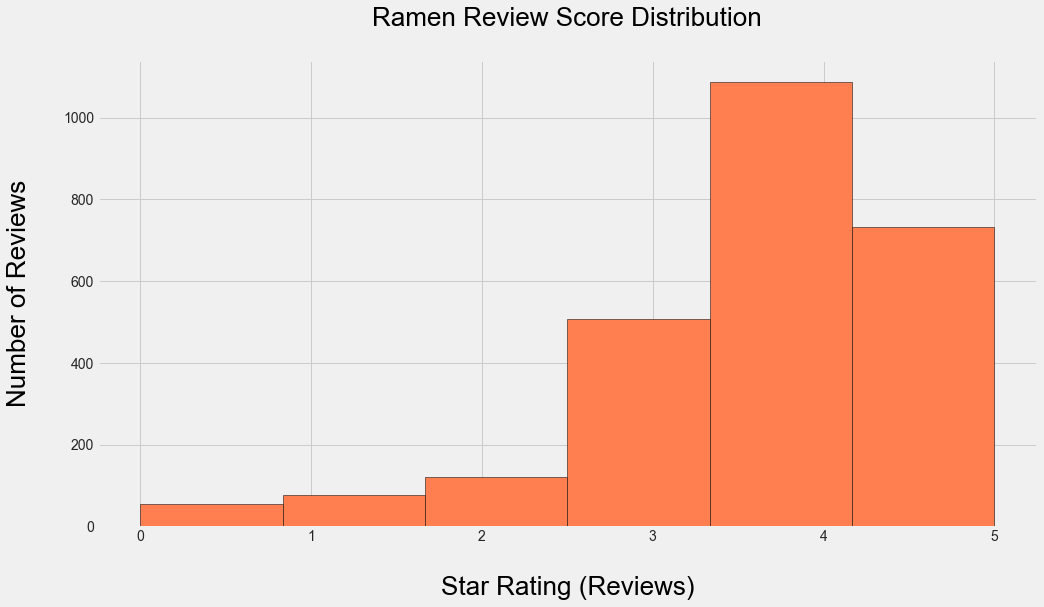

In [291]:
## Plot histogram

plt.figure(figsize=(15,8))
ramen_star_dist = ramen_df['Stars'].plot(kind='hist',bins=6,color='coral',edgecolor='black')
plt.title('Ramen Review Score Distribution\n',fontsize=26, color='black')
plt.xlabel('\nStar Rating (Reviews)',fontsize=26, color='black')
plt.ylabel('Number of Reviews\n',fontsize=26, color='black')
plt.savefig('visualizations/ramen_distribution.png')
plt.show()


In [214]:
country_df = ramen_df.groupby('Country').count()
sorted_country_df = country_df.sort_values('Brand',ascending=False)
top_10_reviews = sorted_country_df.head(10)

countries = [name for name in top_10_reviews.index]
print(countries)

['Japan', 'USA', 'South Korea', 'Taiwan', 'Thailand', 'China', 'Malaysia', 'Hong Kong', 'Indonesia', 'Singapore']


In [295]:
top_bar = px.bar(top_10_reviews['Stars'])
top_bar.update_layout(title='Countries with the Most Reviews\n',
                      title_font_size=26,
                      xaxis_title='\nCountry',
                      yaxis_title='Total Number of Reviews\n',
                      xaxis_title_font_size=20,
                      yaxis_title_font_size=20,
                      hoverlabel=dict(bgcolor='white'),
                      showlegend=False
                     )
top_bar.update_traces(marker_color='aqua', marker_line_color='cornflowerblue',marker_line_width=1.5, opacity=0.6)


top_bar.show()
top_bar.write_image('visualizations/countries_most_reviews.png')

In [233]:
some_new_df = ramen_df.loc[ramen_df['Country'].isin(countries)]
some_new_df

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,
2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,
2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,
2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,
2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,
...,...,...,...,...,...,...
8,Tung-I,Chinese Beef Instant Rice Noodle,Pack,Taiwan,3.00,
4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.00,
3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,


In [234]:
#import plotly for bubble graph
#reference data for graph
fig = px.area(some_new_df, x='Country',y='Stars', color='Brand',hover_name='Variety')
    
#format graph font and font color
#fig.update_layout(font_family="Courier New",font_color="midnightblue",title_font_family="Times New Roman",title_font_color="dimgrey",legend_title_font_color="dimgrey")
    
#show graph
fig.show()

In [235]:
top_brands_USA = ramen_df.loc[ramen_df['Country']=='USA']
top_brands_USA = top_brands_USA.sort_values('Stars',ascending=False)



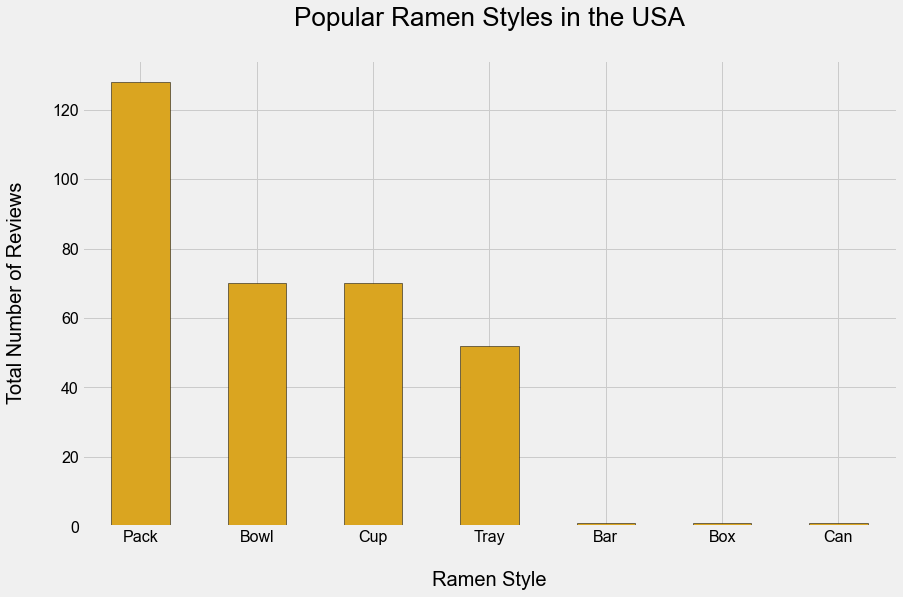

In [297]:
## Plot Star reviews by Style from USA

some_df = top_brands_USA.groupby('Style').count()
sorted_some_df = some_df.sort_values('Brand',ascending=False)
plt.figure(figsize=(13,8))
some_plot = sorted_some_df['Stars'].plot.bar(rot=0,color='goldenrod',edgecolor='black')
plt.title('Popular Ramen Styles in the USA\n',fontsize=26,color='black')
plt.xlabel('\nRamen Style',fontsize=20,color='black')
plt.ylabel('Total Number of Reviews\n',fontsize=20,color='black')
plt.xticks(color='black',fontsize=16)
plt.yticks(color='black',fontsize=16)
plt.axis('on')
plt.savefig('visualizations/popular_ramen_styles_usa.png')
plt.show()


In [294]:
ramen_star_dist = px.histogram(top_brands_USA,x='Stars',color='Country')
ramen_star_dist.update_layout(title='Ramen Reviews in the USA\n',
                      title_font_size=26,
                      xaxis_title='\nStar Reviews',
                      yaxis_title='Total Number of Reviews\n',
                      xaxis_title_font_size=20,
                      yaxis_title_font_size=20,
                      hoverlabel=dict(bgcolor='white'),
                      showlegend=False
                     )
ramen_star_dist.update_traces(marker_color='tomato', marker_line_color='silver',marker_line_width=1.5, opacity=0.75)




ramen_star_dist.show()
ramen_star_dist.write_image('visualizations/reviews_usa.png')

In [296]:
#import plotly for bubble graph
#reference data for graph
fig = px.scatter(top_brands_USA, x='Stars', color='Brand',hover_name='Variety')
    
#format graph font and font color
fig.update_layout(title='All Reveiws for Ramen in the USA',
                  title_font_size=26,
                  xaxis_title='Stars (Reviews)',
                  xaxis_title_font_size=26,
                  yaxis_title='Total Number of Reviews',
                  yaxis_title_font_size=26,
                  font_family="Courier New",
                  font_color="midnightblue",
                  title_font_family="Times New Roman",
                  title_font_color="dimgrey",
                  legend_title_font_color="dimgrey")
    
#show graph
fig.show()
fig.write_image('visualizations/all_ramen_reviews.png')

In [70]:
## plot by star reviews in USA

new_df = top_brands_USA.groupby(['Stars','Brand']).count()
brands_top_brands = new_df.loc[5.0]
brands_top_brands = brands_top_brands.sort_values('Variety')

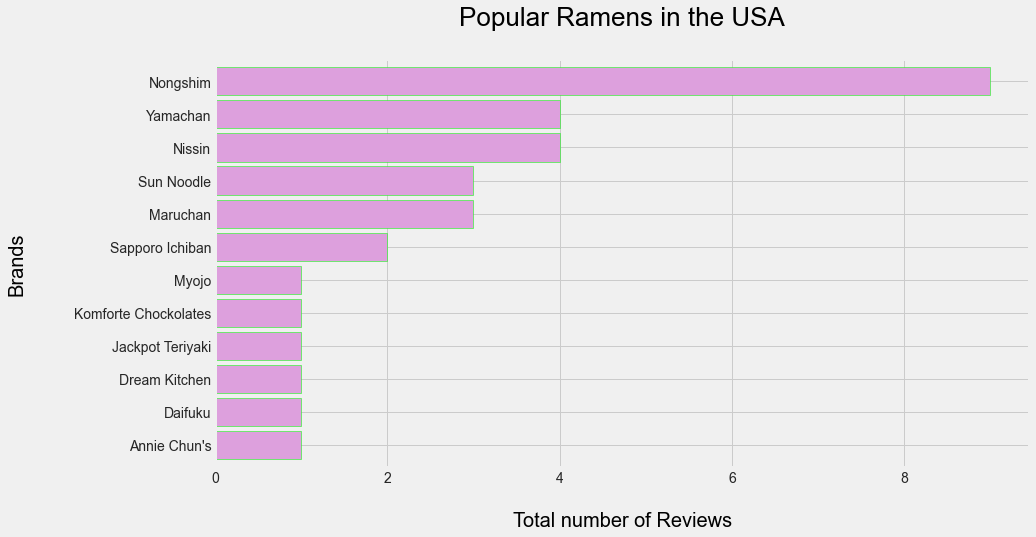

In [298]:
## Most Top 5 reviews

plt.figure(figsize=(13,7))
plt3 = brands_top_brands['Variety'].plot(kind='barh',color='plum',width=0.85,edgecolor='lime')
plt.title('Popular Ramens in the USA\n',fontsize=26,color='black')
plt.xlabel('\nTotal number of Reviews',fontsize=20,color='black')
plt.ylabel('Brands\n\n',fontsize=20,color='black')
plt.savefig('visualizations/popular_ramen_usa.png')
plt.show()

In [79]:
nongshim = top_brands_USA.loc[top_brands_USA['Brand']=='Nongshim']
nongshim

,Brand,Variety,Style,Country,Stars,Top Ten
Review #,,,,,,
1485,Nongshim,Spicy Tonkotsu Noodle Soup,Pack,USA,5.00,
934,Nongshim,Jinjja Jinjja Flamin' Hot & Nutty,Pack,USA,5.00,2013 #4
2248,Nongshim,Shin Noodle Soup,Cup,USA,5.00,
2064,Nongshim,Arrabiata Rice Bucatini,Pack,USA,5.00,
2098,Nongshim,Kimchi Flavor Noodle Soup,Cup,USA,5.00,
1824,Nongshim,Soon Veggie Noodle Soup,Cup,USA,5.00,
1178,Nongshim,Shin Black Spicy Pot-au-feu Flavor Premium Noo...,Cup,USA,5.00,
872,Nongshim,Chapagetti,Bowl,USA,5.00,
1678,Nongshim,Shin Black Spicy Po-Au-Feu Flavor (Mew Edition),Pack,USA,5.00,


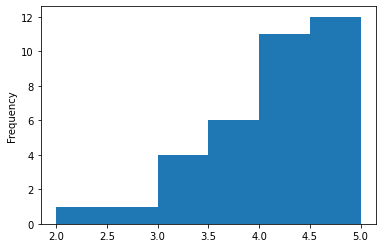

In [82]:
## Plot the review count by stars

nongshim_plot = nongshim['Stars'].plot(kind='hist',bins=6)